In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Lets test this on some real data...

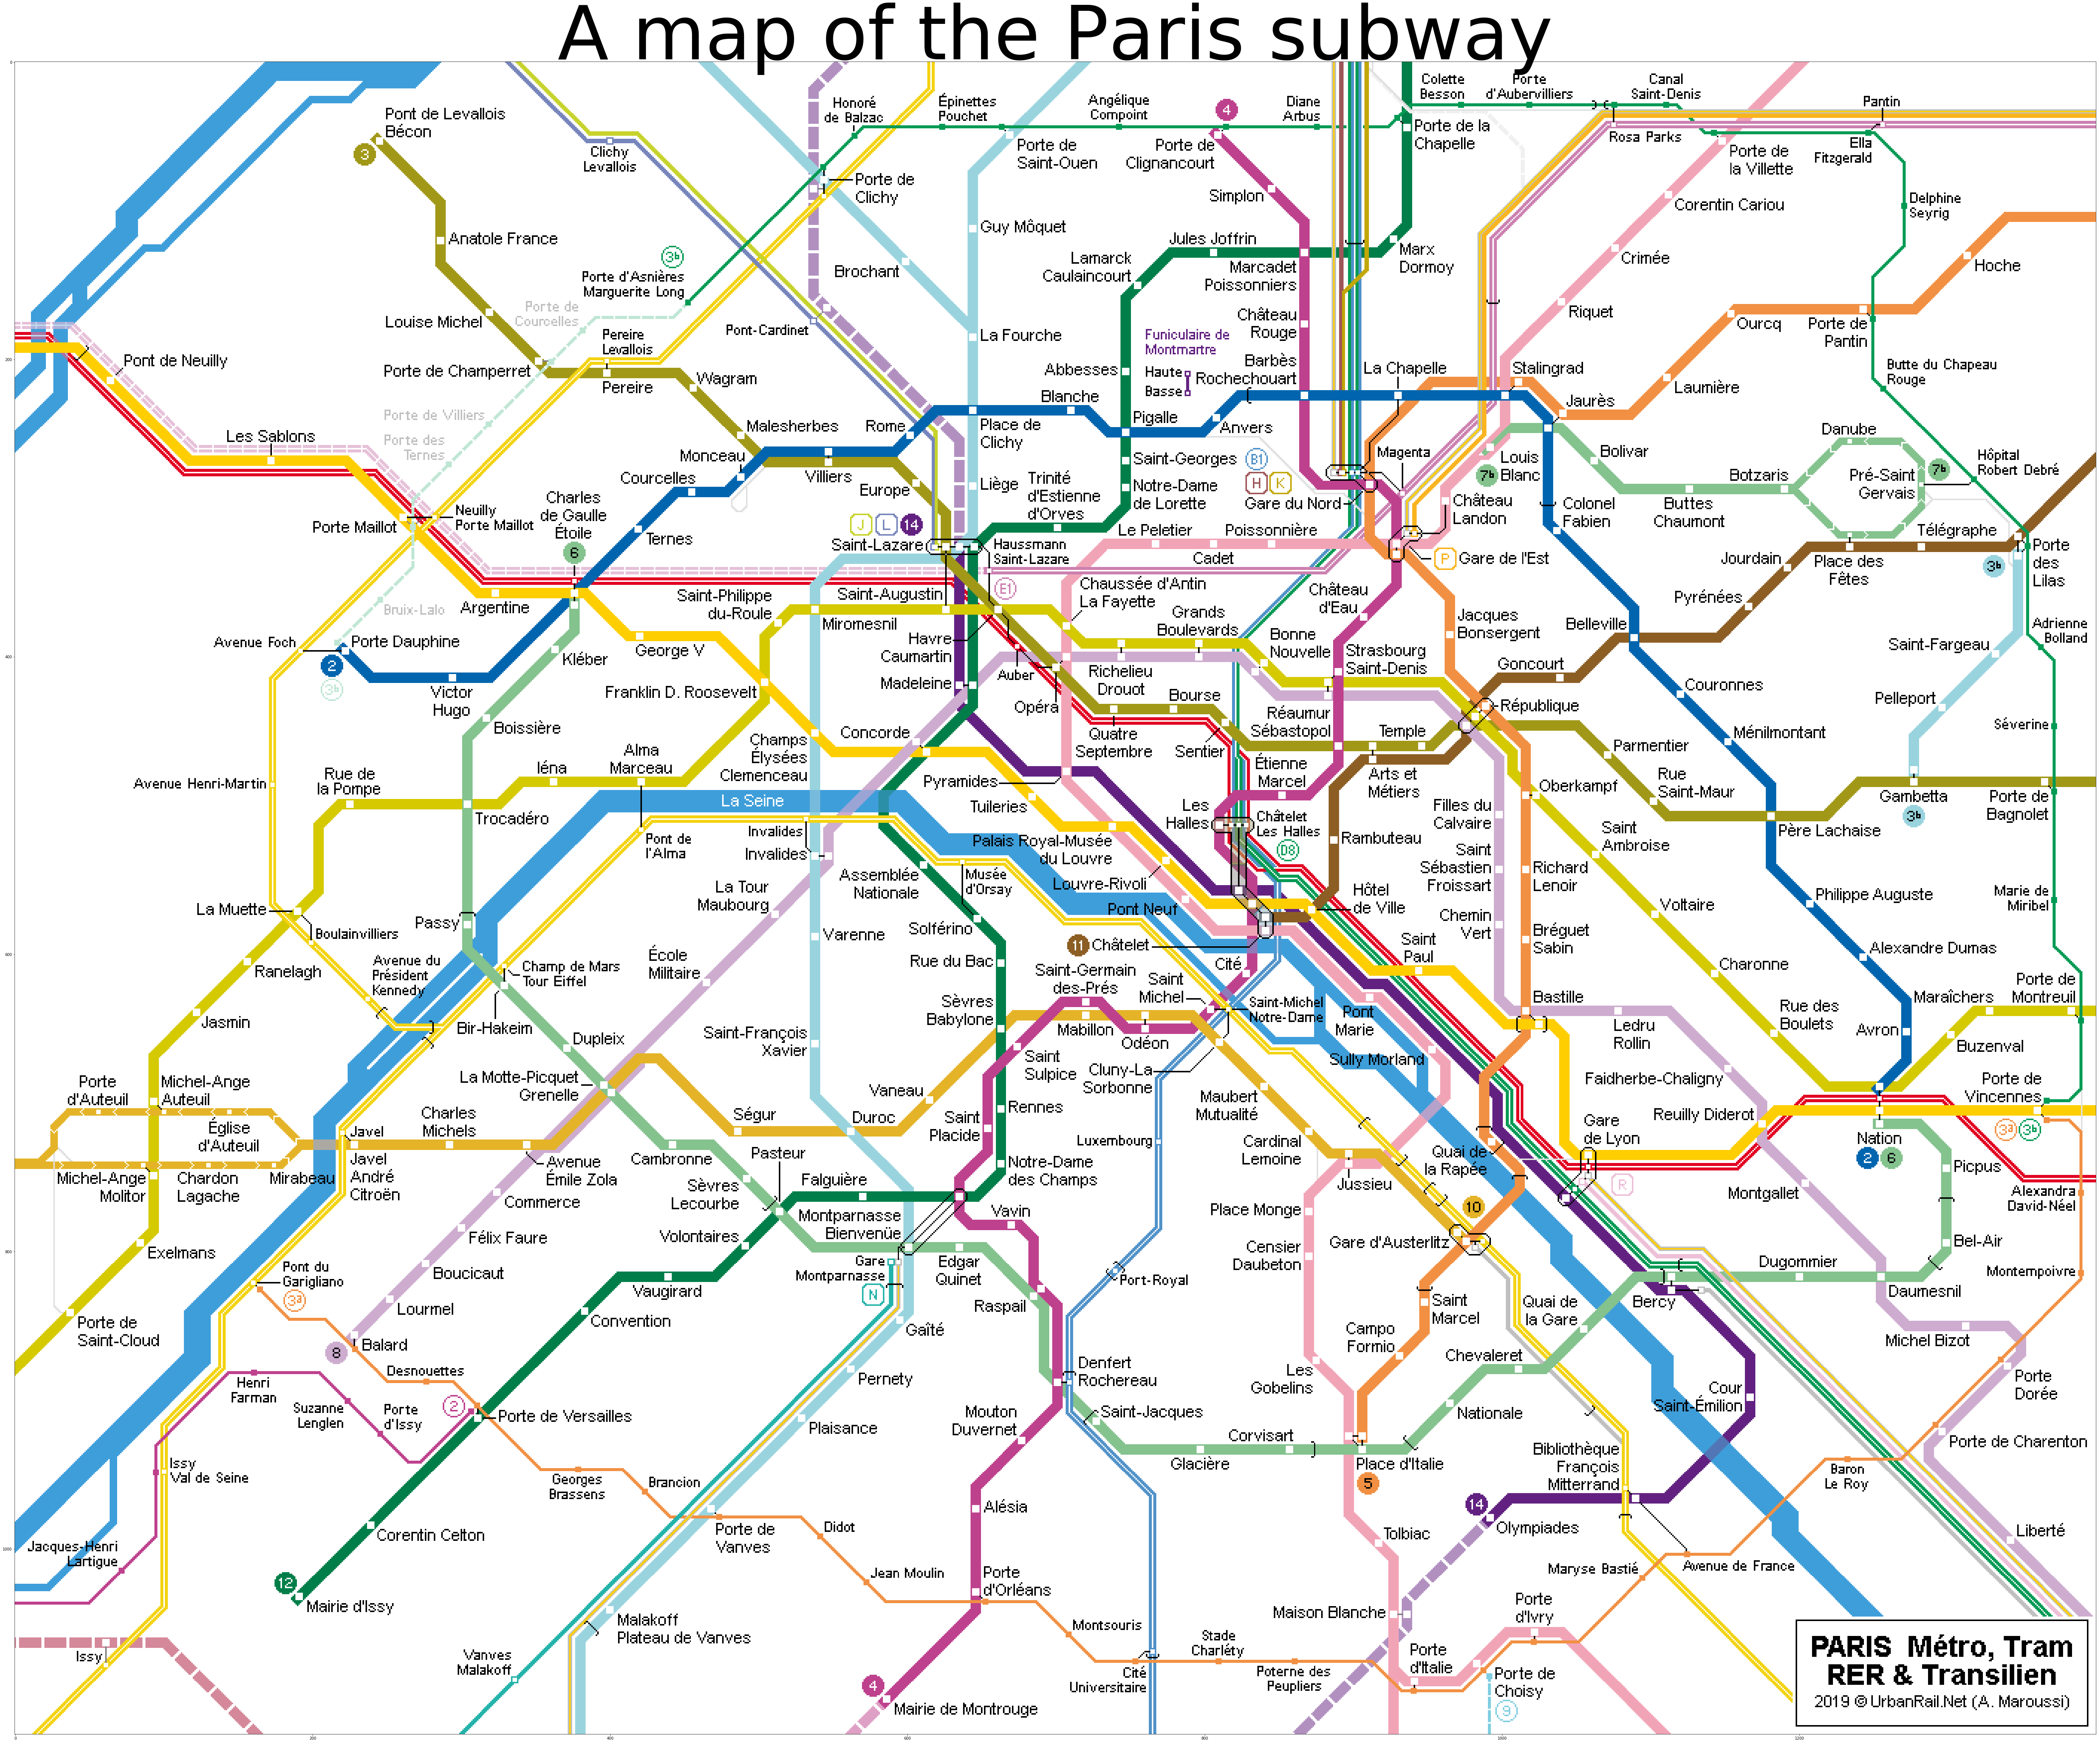

In [2]:
plt.figure(figsize = (100,100))
img=mpimg.imread('/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/GA_github_repo/HW/final/images/paris-map-centre.png')
imgplot = plt.imshow(img)
plt.title("A map of the Paris subway", fontsize = 200)
plt.show()

# Importing & cleaning the Paris Metro System data

In [3]:
path_arcs = "/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/GA_github_repo/HW/final/data/arcs.csv"

In [4]:
path_nodes = "/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/GA_github_repo/HW/final/data/names.csv"

In [5]:
arcs = pd.read_csv(path_arcs, header = None)

In [6]:
nodes = pd.read_csv(path_nodes, header = None)

In [7]:
arcs.head()

,0
0,1;2;1027.280873
1,1;319;9.062544346
2,2;1;1027.280873
3,2;3;785.9391174
4,3;2;785.9391174


In [8]:
empty = []
for items in arcs[0]:
    empty.append(items.split(";"))
    
empty

[['1', '2', '1027.280873'],
 ['1', '319', '9.062544346'],
 ['2', '1', '1027.280873'],
 ['2', '3', '785.9391174'],
 ['3', '2', '785.9391174'],
 ['3', '4', '1010.642024'],
 ['4', '3', '1010.642024'],
 ['4', '5', '756.1225751'],
 ['5', '4', '756.1225751'],
 ['5', '6', '612.0430558'],
 ['6', '5', '612.0430558'],
 ['6', '7', '488.7766869'],
 ['7', '6', '488.7766869'],
 ['7', '8', '437.7222742'],
 ['7', '27', '932.8346722'],
 ['7', '28', '439.5623023'],
 ['7', '114', '417.7038877'],
 ['7', '318', '79.48472634'],
 ['8', '7', '437.7222742'],
 ['8', '9', '648.0441123'],
 ['9', '8', '648.0441123'],
 ['9', '10', '464.9880875'],
 ['9', '216', '338.3564671'],
 ['9', '217', '751.8278323'],
 ['10', '9', '464.9880875'],
 ['10', '11', '698.7604917'],
 ['10', '196', '637.3154549'],
 ['10', '215', '705.9285594'],
 ['11', '10', '698.7604917'],
 ['11', '12', '547.7184995'],
 ['11', '195', '452.7758986'],
 ['11', '196', '824.9621627'],
 ['11', '264', '619.2857234'],
 ['12', '11', '547.7184995'],
 ['12', '13

In [9]:
V1 = []
for items in empty:
    V1.append(np.int32(items[0]))

V2 = []
for items in empty:
    V2.append(np.int32(items[1]))

dist = []
for items in empty:
    dist.append(np.float64(items[2]))
      
arcs_dict ={
    "Origin":V1,
    "Destination":V2,
    "Distance":dist,
}

arcs = pd.DataFrame.from_dict(arcs_dict)

In [10]:
arcs.head(10)

,Origin,Destination,Distance
0,1,2,1027.280873
1,1,319,9.062544
2,2,1,1027.280873
3,2,3,785.939117
4,3,2,785.939117
5,3,4,1010.642024
6,4,3,1010.642024
7,4,5,756.122575
8,5,4,756.122575
9,5,6,612.043056


In [11]:
nodes.head()

,0
0,La Défense (Grande Arche);
1,Esplanade de la Défense;
2,Pont de Neuilly;
3,Les Sablons (Jardin d'acclimatation);
4,Porte Maillot;


In [12]:
names = []
for items in nodes[0]:
    names.append(items[:len(items)-1])
    
idx = []
i = 1
for items in nodes[0]:
    idx.append(i)
    i += 1

nodes_dict = {
    "idx":idx,
    "names":names
}

nodes = pd.DataFrame.from_dict(nodes_dict)

In [13]:
nodes.head(10)

,idx,names
0,1,La Défense (Grande Arche)
1,2,Esplanade de la Défense
2,3,Pont de Neuilly
3,4,Les Sablons (Jardin d'acclimatation)
4,5,Porte Maillot
5,6,Argentine
6,7,Charles de Gaulle-Etoile
7,8,George V
8,9,Franklin-Roosevelt
9,10,Champs-Elysées-Clémenceau


In [93]:
station_dict = {}

for i in nodes.index.tolist():
    station_dict[nodes["idx"][i]] = nodes["names"][i]
station_dict

{1: 'La Défense (Grande Arche)',
 2: 'Esplanade de la Défense',
 3: 'Pont de Neuilly',
 4: "Les Sablons (Jardin d'acclimatation)",
 5: 'Porte Maillot',
 6: 'Argentine',
 7: 'Charles de Gaulle-Etoile',
 8: 'George V',
 9: 'Franklin-Roosevelt',
 10: 'Champs-Elysées-Clémenceau',
 11: 'Concorde',
 12: 'Tuileries',
 13: 'Palais-Royal (Musée du Louvre)',
 14: 'Louvre-Rivoli',
 15: 'Châtelet',
 16: 'Hôtel de Ville',
 17: 'Saint-Paul (Le Marais)',
 18: 'Bastille',
 19: 'Gare de Lyon',
 20: 'Reuilly-Diderot',
 21: 'Nation',
 22: 'Porte de Vincennes',
 23: 'Saint-Mandé',
 24: 'Bérault',
 25: 'Château de Vincennes',
 26: 'Porte Dauphine (Maréchal de Lattre de Tassigny)',
 27: 'Victor Hugo',
 28: 'Ternes',
 29: 'Courcelles',
 30: 'Monceau',
 31: 'Villiers',
 32: 'Rome',
 33: 'Place de Clichy',
 34: 'Blanche',
 35: 'Pigalle',
 36: 'Anvers',
 37: 'Barbès-Rochechouart',
 38: 'La Chapelle',
 39: 'Stalingrad',
 40: 'Jaurès',
 41: 'Colonel Fabien',
 42: 'Belleville',
 43: 'Couronnes',
 44: 'Ménilmontant

In [14]:
nbNodes = len(nodes)

In [15]:
print("There are",nbNodes,"stations in the paris metro system.") 

There are 366 stations in the paris metro system.


In [16]:
nbArcs = arcs.shape[0]

In [17]:
print("There are",nbArcs,"arcs connecting each adjacent metro station in the system") 

There are 866 arcs connecting each adjacent metro station in the system


## Visualizing the metro system as `Directed Network` using the `networkX` python library

In [18]:
import networkx as nx

In [19]:
stations = np.array([i for i in range(1,367)])

In [20]:
stations

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [21]:
edges = []
for i in range(len(arcs)):
    edges.append(np.array(arcs.loc[i:i:,["Origin","Destination"]])[0])

In [22]:
edges = np.array(edges)

In [23]:
edges

array([[  1,   2],
       [  1, 319],
       [  2,   1],
       ...,
       [365, 364],
       [365, 366],
       [366, 365]])

#### `nx.DiGraph()` creates a directed graph from a list of arcs/nodes

In [24]:
G = nx.DiGraph() 

In [25]:
G.add_nodes_from(stations)

In [26]:
G.add_edges_from(edges)  

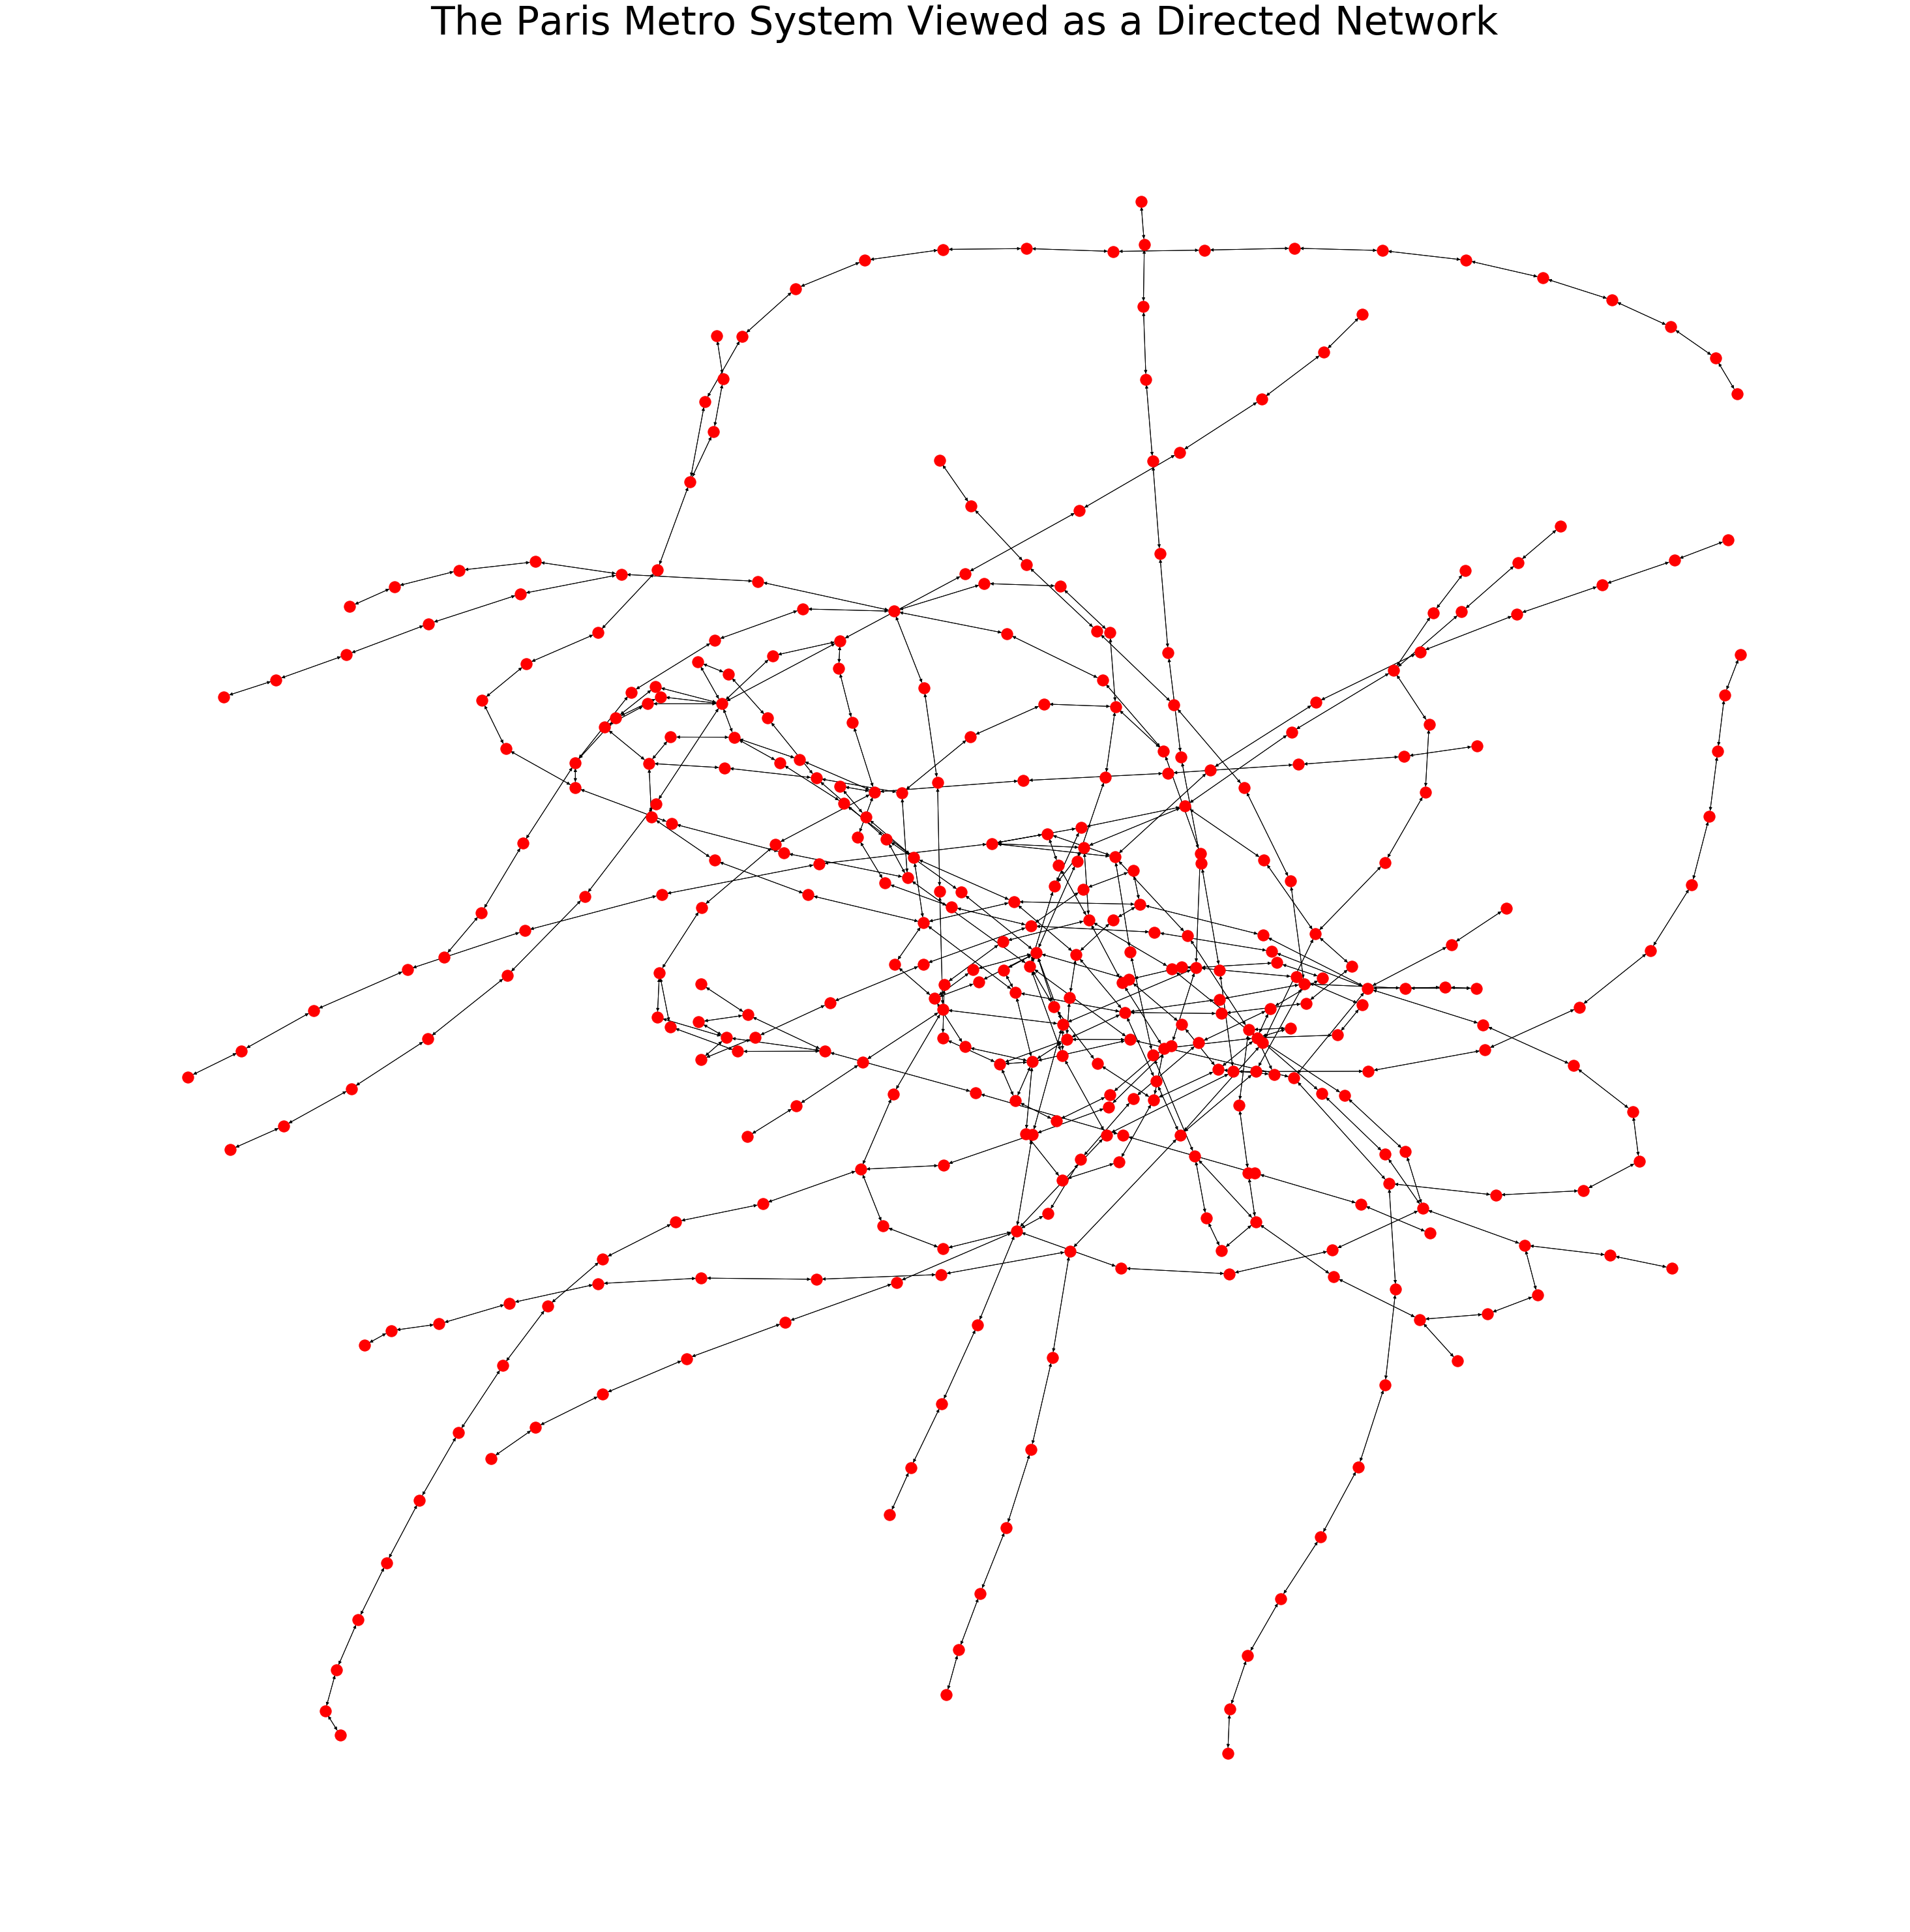

In [114]:
plt.figure(figsize=(40,40))
nx.draw(G)
plt.title("The Paris Metro System Viewed as a Directed Network", fontsize = 60)
plt.show()

# Lets setup an example route between `Saint-Germain des Prés` and  `Trocadéro`

### initalize the station list `n` as a list of 0s

In [28]:
n = np.array([0]*nbNodes)

In [29]:
len(n) #note the length of n should be equal to the number of stations

366

In [30]:
nodes["names"][nodes.idx == 84] #let this be our origin station 

83    Saint-Germain des Prés
Name: names, dtype: object

In [31]:
nodes["names"][nodes.idx == 116] #let this be our destination station

115    Trocadéro
Name: names, dtype: object

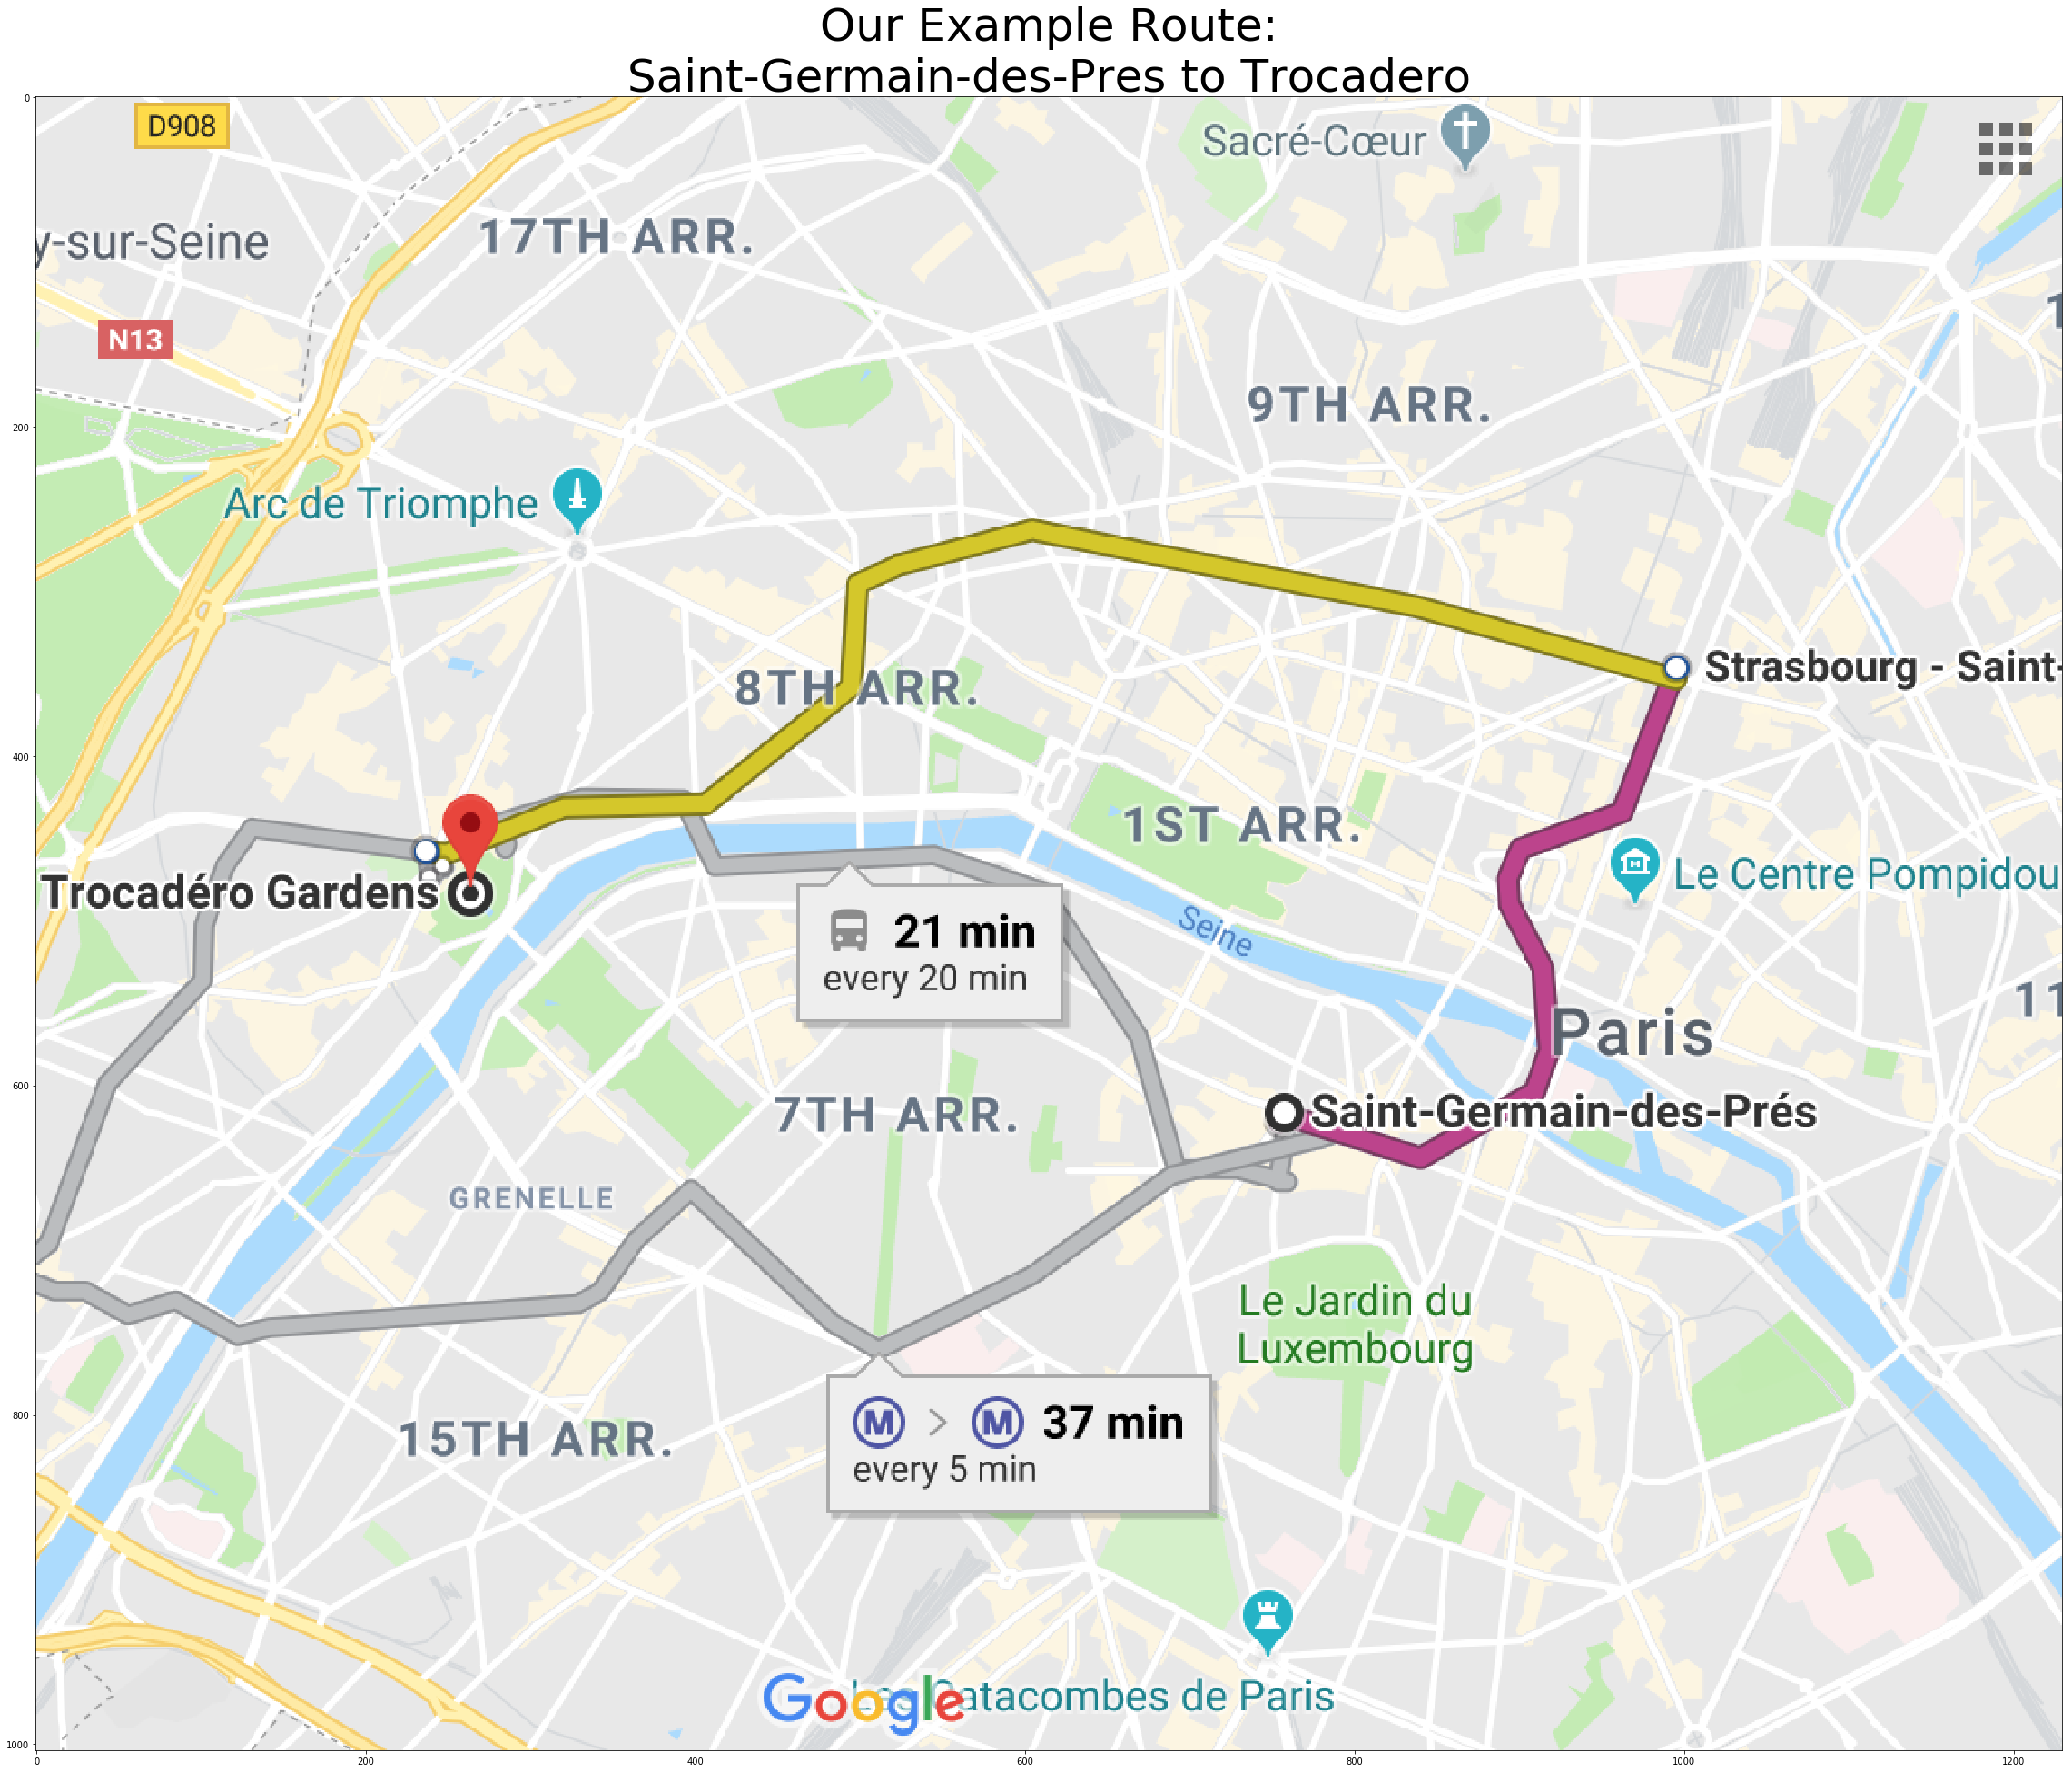

In [79]:
plt.figure(figsize = (40,40))
img=mpimg.imread('/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/GA_github_repo/HW/final/images/route.png')
imgplot = plt.imshow(img)
plt.title("Our Example Route:"+"\n"+"Saint-Germain-des-Pres to Trocadero", fontsize = 50)
plt.show()

### next set the station list `n` to -1 at the index of the origin station and +1 at the index of the  destination station

In [33]:
n[83] = -1
n[115] = 1

### grab the list of distances `ℓ` between each adjacent station x and y from the `arcs` dataframe

In [34]:
arc_lengths = np.array(arcs["Distance"])

In [35]:
arc_lengths

array([1.02728087e+03, 9.06254435e+00, 1.02728087e+03, 7.85939117e+02,
       7.85939117e+02, 1.01064202e+03, 1.01064202e+03, 7.56122575e+02,
       7.56122575e+02, 6.12043056e+02, 6.12043056e+02, 4.88776687e+02,
       4.88776687e+02, 4.37722274e+02, 9.32834672e+02, 4.39562302e+02,
       4.17703888e+02, 7.94847263e+01, 4.37722274e+02, 6.48044112e+02,
       6.48044112e+02, 4.64988088e+02, 3.38356467e+02, 7.51827832e+02,
       4.64988088e+02, 6.98760492e+02, 6.37315455e+02, 7.05928559e+02,
       6.98760492e+02, 5.47718500e+02, 4.52775899e+02, 8.24962163e+02,
       6.19285723e+02, 5.47718500e+02, 4.43475686e+02, 4.43475686e+02,
       4.58893590e+02, 4.82448040e+02, 6.68421631e+02, 4.58893590e+02,
       5.01988527e+02, 5.01988527e+02, 3.75427216e+02, 2.50421290e+03,
       3.81335409e+02, 4.19412284e+02, 3.79605103e+02, 9.54572928e+02,
       1.36114450e+03, 2.94601031e+02, 3.75427216e+02, 6.95994668e+02,
       5.35659119e+02, 6.95994668e+02, 6.76108978e+02, 6.76108978e+02,
      

### create the incidence matrix `∇'` for the metro network using the `nx.incidence_matrix()` method

In [36]:
nabla = nx.incidence_matrix(G,oriented = True)

In [37]:
nabla = np.transpose(nabla)

In [40]:
nabla = nabla.toarray()

In [38]:
print(nabla.toarray()[3])

[ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

clearly the matrix `∇'` is very sparse

## Q: How do we numerically solve the `Optimal Flow Problem`? 

$$ min\sum_{(x,y)\in S} \varphi(x,y)\ell(x,y)$$

 $$s.t. \:\:  {\nabla'}{\varphi} = n,$$
  $${\varphi}\geq0$$ 

## A: Using an iterative optimization method called `Linear Programming (LP)`

many problems in economics, transportation, energy, planning, assignment, scheduling, design, etc are solved using `LP` 

- certain commerical-level LP solvers such as `gurobi` are optimized for handling sparse matrices and could provide fast results for an optimal flow problem on a continent scale road network
- `gurobi` requires an academic license to use however
- since our example is small we can import the `scipy.optimize` package's LP solver `linprog`

In [39]:
from scipy.optimize import linprog

In [47]:
res = linprog(arc_lengths, A_ub=np.transpose(nabla), b_ub=n,
               options={"disp": True})

Optimization terminated successfully.
         Current function value: 5394.393536 
         Iterations: 323


In [48]:
print("The shortest path between the origin and destination is:",format(res.fun, ".2f")+" "+"meters")

The shortest path between the origin and destination is: 5394.39 meters


In [49]:
res.x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [50]:
len(res.x)

866

In [51]:
pi = res.x

In [52]:
arg_pi = np.array([items[0] for items in np.argwhere(pi==1)])

In [53]:
arg_pi

array([240, 244, 246, 248, 332, 334, 336, 338, 596, 599])

In [54]:
#arcs

In [55]:
arcs[arcs.Origin == 83 + 1]

,Origin,Destination,Distance
248,84,83,376.026465
249,84,85,386.054225


In [56]:
arcs[arcs.Origin == 83 + 1].index

Int64Index([248, 249], dtype='int64')

In [57]:
list(set(arcs[arcs.Origin == 83 + 1].index) & set(arg_pi))[0]

248

In [58]:
arcs["Destination"][list(set(arcs[arcs.Origin == 83 + 1].index) & set(arg_pi))[0]]

83

In [59]:
arcs[arcs.Origin == 83]

,Origin,Destination,Distance
246,83,82,551.451241
247,83,84,376.026465


In [146]:
path = []
originNode = 84
destinationNode = 116
const = True

path.append(originNode)
while const:
    originNode = arcs["Destination"][list(set(arcs[arcs.Origin == originNode].index) & set(arg_pi))[0]]
    if originNode == destinationNode:
        const = False
    path.append(originNode)
path.append(destinationNode)

[station_dict[items] for items in path]

['Saint-Germain des Prés',
 'Saint-Sulpice',
 'Saint-Placide',
 'Montparnasse-Bienvenue',
 'Duroc',
 'Ségur',
 'La Motte-Picquet-Grenelle',
 'Dupleix',
 'Bir-Hakeim (Grenelle)',
 'Passy',
 'Trocadéro',
 'Trocadéro']

In [118]:
# plt.figure(figsize=(20,20))
# nx.draw(G, with_labels=False)
# nx.draw_networkx_labels(G,nx.spring_layout(G),route_dict,font_size=16,font_color='b')
# plt.show()

In [61]:
path = np.array(path) - 1

In [62]:
path

array([ 83,  82,  81,  80, 237, 236, 119, 118, 117, 116, 115])

In [63]:
print("The following sequence of stops corresponds to the shortest path:")
print()
for i in range(len(path)):
    print("#"+str(i+1)+":",names[path[i]])
    print()

The following sequence of stops corresponds to the shortest path:

#1: Saint-Germain des Prés

#2: Saint-Sulpice

#3: Saint-Placide

#4: Montparnasse-Bienvenue

#5: Duroc

#6: Ségur

#7: La Motte-Picquet-Grenelle

#8: Dupleix

#9: Bir-Hakeim (Grenelle)

#10: Passy

#11: Trocadéro



In [149]:
np.array(nodes["idx"])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## tie the solution up into one function call `optimizeRoute()`

In [197]:
def optimizeRoute(originNode,destinationNode,arcs,nodes):
    
    #initalize station list n as 0s
    n = np.array([0]*nbNodes)
    #set origin station and the destination in the station list 
    n[originNode-1] = -1
    n[destinationNode-1] = 1
    #extract tunnel distances ℓ for each arc
    arc_lengths = np.array(arcs["Distance"])
    #extract incidence matrix ∇′ from graph G using networkx.incidencematrix()
    G = nx.DiGraph() 
    G.add_nodes_from(np.array([i for i in range(1,nbNodes+1)]))
    G.add_edges_from(np.array([np.array(arcs.loc[i:i:,["Origin","Destination"]])[0] for i in range(len(arcs))])) 
    nabla = nx.incidence_matrix(G,oriented = True)
    nabla = nabla.toarray()
    
    #solve the LP using scipy.optimize.linprog
    res = linprog(arc_lengths, A_ub=nabla, b_ub=n,
               options={"disp": True})
    #grab minimium dist and optimal path list
    dist = res.fun
    phi = res.x
    arg_phi = np.array([items[0] for items in np.argwhere(phi==1)])
    #retrieve list of stops from the list of arcs via a simple algorithm
    path = []
    path.append(originNode)
    while True:
        originNode = arcs["Destination"][list(set(arcs[arcs.Origin == originNode].index) & set(arg_phi))[0]]
        if originNode == destinationNode:
            break
        path.append(originNode)
    path.append(destinationNode)
    path = np.array(path) - 1
    
    #Display the results
    print()
    print()
    print("\t\t\t Optimal Flow -- Model Results ")
    print()
    print("-"*75)
    print("The shortest path between\n","'"+names[path[0]]+"'","and","'"+names[path[len(path)-1]]+"'" 
          " is:",format(res.fun, ".2f")+" "+"meters")
    print("-"*75)
    print()
    print()
    print("="*75)
    print("The following sequence of stops corresponds to the shortest path:")
    print("="*75)
    print()
    for i in range(len(path)):
        print("#"+str(i+1)+":",names[path[i]])
        print() 

In [201]:
optimizeRoute(84,116,arcs,nodes)

Optimization terminated successfully.
         Current function value: 5394.393536 
         Iterations: 323


			 Optimal Flow -- Model Results 

---------------------------------------------------------------------------
The shortest path between
 'Saint-Germain des Prés' and 'Trocadéro' is: 5394.39 meters
---------------------------------------------------------------------------


The following sequence of stops corresponds to the shortest path:

#1: Saint-Germain des Prés

#2: Saint-Sulpice

#3: Saint-Placide

#4: Montparnasse-Bienvenue

#5: Duroc

#6: Ségur

#7: La Motte-Picquet-Grenelle

#8: Dupleix

#9: Bir-Hakeim (Grenelle)

#10: Passy

#11: Trocadéro

